In [ ]:
NAME Shoeb Qureshi
project Oasis Infobyte: Task 3
Objective = Used Car Price Prediction Model

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
import pandas as pd

file_path = r"C:\Users\qshoe\car data.csv"  # Use raw string (r"") to avoid Unicode issues
car = pd.read_csv(file_path)

In [82]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [83]:
print(car["Selling_Price"].unique())
print(car["Fuel_Type"].unique())
print(car["Transmission"].unique())
print(car["Owner"].unique())

[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25  5.11  2.7
  6.15 11.45  3.9   9.1   4.8   2.    5.35  6.25  5.95  5.2   3.75 12.9
  5.    5.4   7.2  10.25  8.5   8.4   9.15  6.6   3.65  8.35  6.7   5.3
 10.9   8.65  9.7   2.1   8.99  7.4   5.65 10.11  6.4   8.55  9.5  11.5 ]
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]

In [11]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
car.duplicated().sum()

2

In [14]:
car.drop_duplicates(inplace=True)

In [15]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
#Converting the data type of the "Year" column to datetime
car["Year"] = pd.to_datetime(car["Year"], format="%Y")

In [17]:
car["Owner"] = car["Owner"].astype("int32")
car["Driven_kms"] = car["Driven_kms"].astype("int32")

In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_Name       299 non-null    object        
 1   Year           299 non-null    datetime64[ns]
 2   Selling_Price  299 non-null    float64       
 3   Present_Price  299 non-null    float64       
 4   Driven_kms     299 non-null    int32         
 5   Fuel_Type      299 non-null    object        
 6   Selling_type   299 non-null    object        
 7   Transmission   299 non-null    object        
 8   Owner          299 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 21.0+ KB


In [19]:
car["Year"].unique()

<DatetimeArray>
['2014-01-01 00:00:00', '2013-01-01 00:00:00', '2017-01-01 00:00:00',
 '2011-01-01 00:00:00', '2018-01-01 00:00:00', '2015-01-01 00:00:00',
 '2016-01-01 00:00:00', '2009-01-01 00:00:00', '2010-01-01 00:00:00',
 '2012-01-01 00:00:00', '2003-01-01 00:00:00', '2008-01-01 00:00:00',
 '2006-01-01 00:00:00', '2005-01-01 00:00:00', '2004-01-01 00:00:00',
 '2007-01-01 00:00:00']
Length: 16, dtype: datetime64[ns]

In [20]:
car.columns = car.columns.str.strip()
print(car.columns)  

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [21]:
car["Year"].nunique()

16

In [22]:
#SELECTING IMPORTANT DATA FOR MODEL BUILDING(#FEATURE SELECTION)
car = car.drop(columns="Car_Name", errors="ignore") 

In [23]:
# ADDING A NEW COLUMN OF A CAR
car["Current_Year"] = 2023

In [85]:
car["Year"] = car["Year"].astype(int)

# Ensure 'Current_Year' column exists before converting its data type
if "Current_Year" not in car.columns:
	car["Current_Year"] = 2023

car["Current_Year"] = car["Current_Year"].astype(int)
car["Age of car"] = car["Current_Year"] - car["Year"]

import numpy as np
car["Year"] = np.nan

In [86]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current_Year,Age of car
0,ritz,NaN,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,NaN,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,NaN,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,NaN,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,NaN,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9
...,...,...,...,...,...,...,...,...,...,...,...
296,city,NaN,9.50,11.60,33988,Diesel,Dealer,Manual,0,2023,7
297,brio,NaN,4.00,5.90,60000,Petrol,Dealer,Manual,0,2023,8
298,city,NaN,3.35,11.00,87934,Petrol,Dealer,Manual,0,2023,14
299,city,NaN,11.50,12.50,9000,Diesel,Dealer,Manual,0,2023,6


In [87]:
cols_to_drop = ["Current_Year", "Year"]
car = car.drop(columns=[col for col in cols_to_drop if col in car.columns])

car

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age of car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [ ]:
 # ENCODING#

In [88]:
car = pd.get_dummies(data=car, drop_first=True)

In [89]:
car

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,10,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.85,4.15,5200,0,12,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,4.60,6.87,42450,0,9,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,4.00,5.90,60000,0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,3.35,11.00,87934,0,14,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,11.50,12.50,9000,0,6,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [90]:
g = ["Fuel_Type_Diesel", "Fuel_Type_Petrol", "Selling_type_Individual", "Transmission_Manual"]
car[g]= car[g].astype(int)

In [91]:
car.head(3)

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,1
1,4.75,9.54,43000,0,10,False,False,False,False,False,...,False,True,False,False,False,False,1,0,0,1
2,7.25,9.85,6900,0,6,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,1


In [92]:
car.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878914,0.029187,-0.088344,-0.236141,-0.070132,-0.048484,-0.050987,-0.044502,-0.046209,...,-0.003107,-0.042241,0.062962,0.052209,-0.049143,0.006038,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878914,1.000000,0.203618,0.008058,0.047192,-0.067286,-0.047633,-0.048904,-0.045692,-0.045692,...,-0.019378,0.007243,0.043519,0.014731,-0.042751,-0.005797,0.473390,-0.465326,-0.512121,-0.348776
Driven_kms,0.029187,0.203618,1.000000,0.089216,0.524342,0.449361,-0.053013,-0.002896,-0.044536,-0.025203,...,-0.008000,0.050668,0.032997,-0.051867,0.011053,-0.024550,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008058,0.089216,1.000000,0.182104,-0.014272,-0.010075,-0.010075,-0.010075,-0.010075,...,-0.022680,-0.024886,-0.038541,-0.010075,-0.020251,0.117621,-0.053469,0.055687,0.124269,-0.050316
Age of car,-0.236141,0.047192,0.524342,0.182104,1.000000,0.046121,-0.067442,-0.027442,-0.047442,-0.047442,...,-0.007748,0.212166,0.004321,-0.087442,0.095596,-0.059276,-0.064315,0.059959,0.039896,-0.000394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Car_Name_xcent,0.006038,-0.005797,-0.024550,0.117621,-0.059276,-0.008206,-0.005793,-0.005793,-0.005793,-0.005793,...,-0.013040,-0.014309,-0.022160,-0.005793,-0.011644,1.000000,-0.050063,0.051103,-0.073976,0.039279
Fuel_Type_Diesel,0.552339,0.473390,0.172515,-0.053469,-0.064315,-0.040808,-0.028808,-0.028808,-0.028808,-0.028808,...,0.065282,-0.011662,0.126733,0.115710,-0.057905,-0.050063,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465326,-0.172874,0.055687,0.059959,0.041656,0.029406,0.029406,0.029406,0.029406,...,-0.062353,-0.044910,-0.121563,-0.113355,-0.012632,0.051103,-0.979648,1.000000,0.358321,0.091013
Selling_type_Individual,-0.550724,-0.512121,-0.101419,0.124269,0.039896,0.110929,0.078308,0.078308,0.078308,0.078308,...,-0.041403,-0.105148,-0.162839,-0.042567,-0.085563,-0.073976,-0.350467,0.358321,1.000000,0.063240


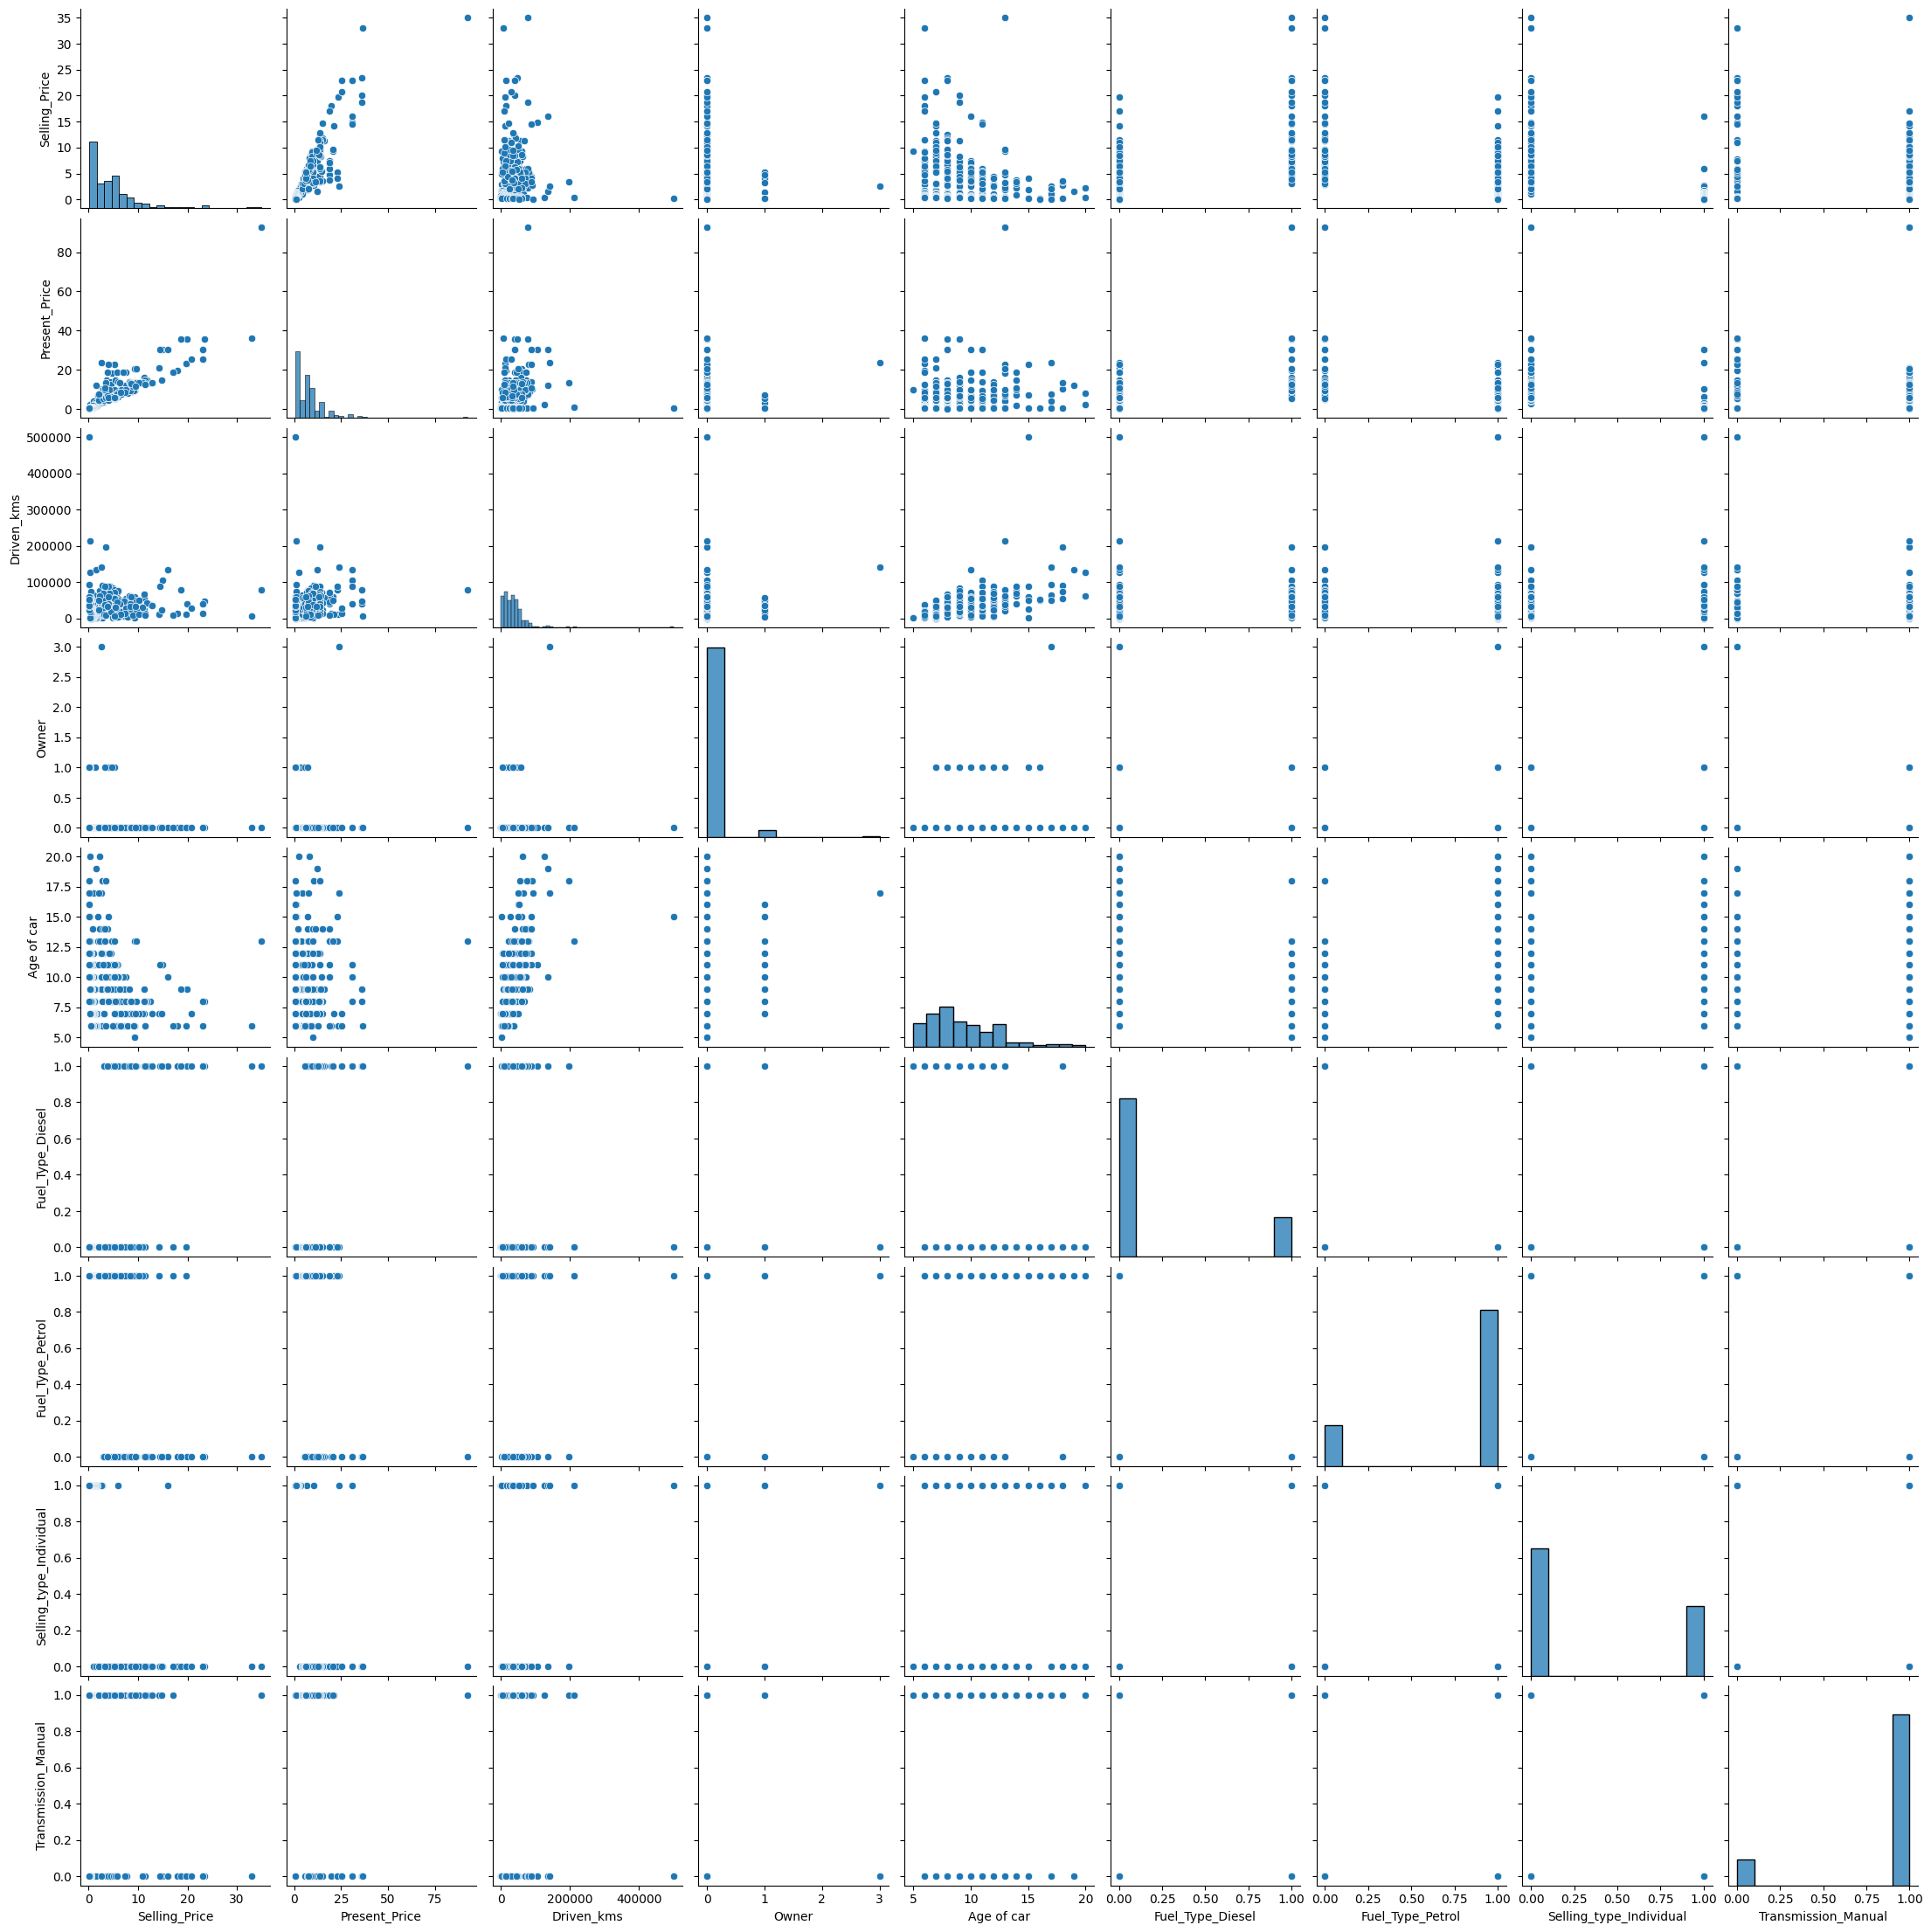

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = car.select_dtypes(include=["number"])

# Check if numeric columns exist before plotting
if not numeric_cols.empty:
    sns.pairplot(numeric_cols)
    plt.show()
else:
    print("No numeric columns found in DataFrame for pairplot.")

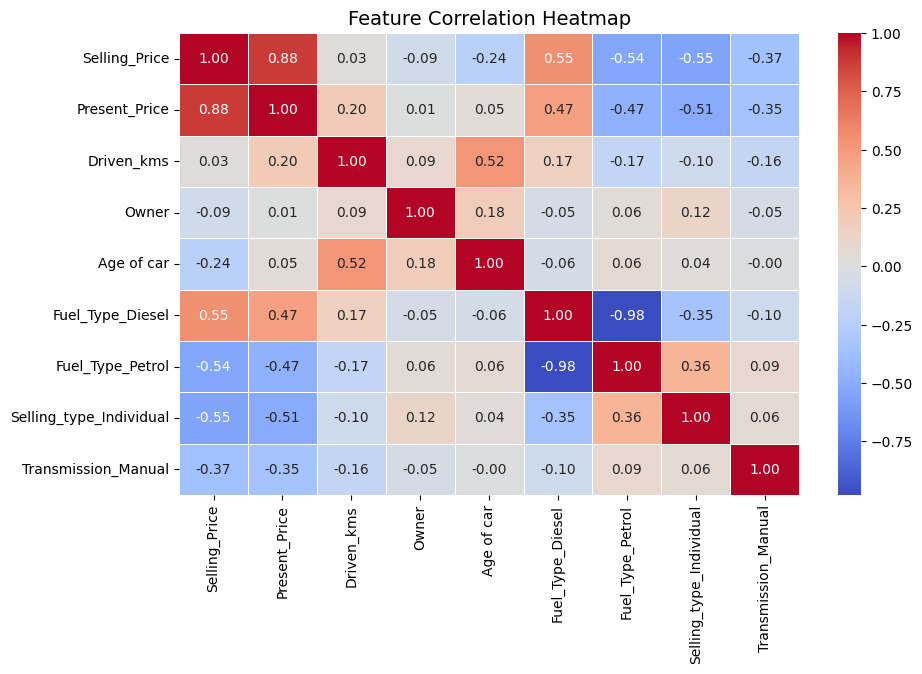

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size

# Ensure only numeric columns are used
numeric_cols = car.select_dtypes(include=["number"])

# Check if numeric columns exist before plotting
if not numeric_cols.empty:
    sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()
else:
    print("No numeric columns found in DataFrame for heatmap.")

In [95]:
# SPLITTING THE DATA 

y = car["Selling_Price"]
X = car.drop(columns="Selling_Price")

In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
X

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
X["Owner"].unique()

array([0, 1, 3])

In [ ]:
#FEATURES IMPORTANCE###

In [ ]:
target_col = "Selling_Price"  # Change this based on actual column name

# Ensure the column exists
if target_col not in car.columns:
    raise KeyError(f"Column '{target_col}' not found in dataset. Check column names: {car.columns.tolist()}")

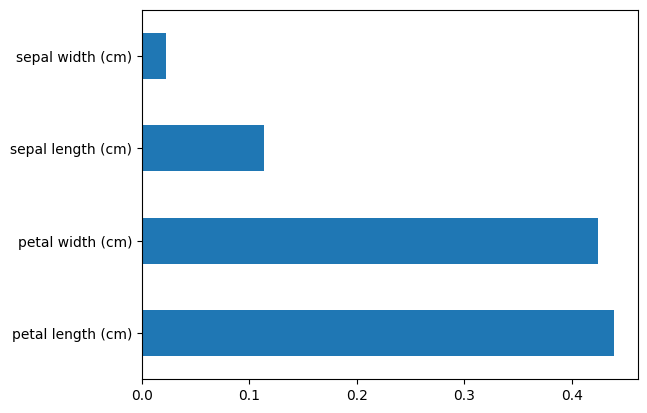

In [96]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show(block=True)
plt.show()

In [97]:
from sklearn.model_selection import train_test_split

# Ensure y is correctly defined
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
x_train.shape

(120, 4)

In [99]:
y_train.shape

(120,)

In [100]:
##BUILDING THE MODEL##

In [101]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [102]:
ypred = regressor.predict(x_test)

In [103]:
ypred

array([1.99, 1.02, 0.  , 2.  , 0.  , 2.  , 0.  , 1.  , 1.08, 1.  , 1.64,
       1.  , 1.  , 1.01, 1.  , 0.  , 1.01, 1.  , 0.  , 0.  , 1.89, 1.01,
       0.  , 0.  , 1.8 , 0.  , 0.  , 1.  , 1.03, 0.  ])

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define and train the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict
ypred = regressor.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, ypred)
print("R² Score:", r2)

R² Score: -0.6309484536082477


In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
parametrs = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],  # Number of trees
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],  # Loss function
    'max_depth': [10, 20, 30, 40, 50],  # Tree depth
    'min_samples_split': [2, 5, 10, 20, 50],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider
}  # <--- Make sure this closing bracket is present

In [107]:
parametrs

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [108]:
random_cv =  RandomizedSearchCV(estimator=regressor, param_distributions=parametrs, n_iter=10,
                                scoring='neg_mean_absolute_error', cv=5, verbose=2, random_state=42, n_jobs=-1)

In [109]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [110]:
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'friedman_mse'}

In [111]:
random_cv.best_score_

-0.7330277801924104

In [112]:
predictions = random_cv.predict(X_test)

Text(0, 0.5, 'density')

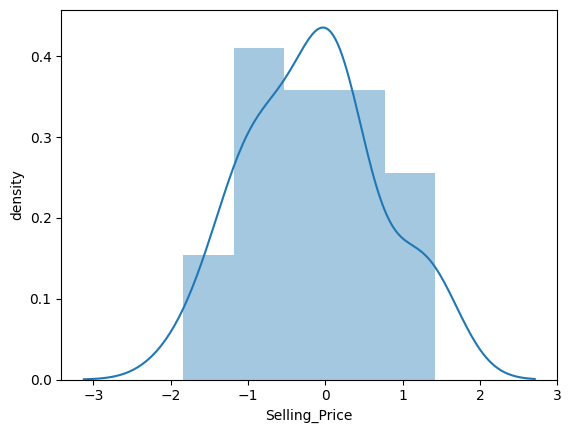

In [113]:
sns.distplot(y_test-predictions)
plt.xlabel("Selling_Price")
plt.ylabel("density")

In [114]:
from sklearn import metrics

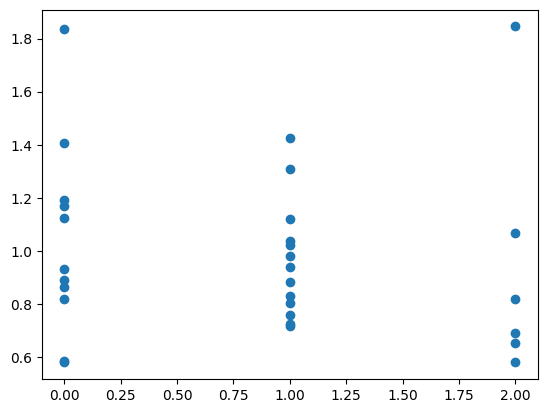

In [115]:
plt.scatter(y_test, predictions)

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6674217525302919
MSE: 0.7194053981428291
RMSE: 0.8481776925519965


In [118]:
car.head(3)

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,1
1,4.75,9.54,43000,0,10,False,False,False,False,False,...,False,True,False,False,False,False,1,0,0,1
2,7.25,9.85,6900,0,6,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,1


In [132]:
single_ob = np.array([9.5, 15000, 0.0, 5.0, 1.0, 0.0, 0.0, 1.0])
single_ob = single_ob.reshape(1, -1)

In [133]:
import numpy as np

# Ensure correct number of features (adjust values accordingly)
single_ob_car = np.array([9.5, 15000, 0.00, 5.0])  # Use the 4 features used in training

# Reshape to match the model input shape
single_ob_car = single_ob_car.reshape(1, -1)

# Predict using the trained model
prediction = regressor.predict(single_ob_car)
print(prediction)

[1.37]


In [134]:
car.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,1
1,4.75,9.54,43000,0,10,False,False,False,False,False,...,False,True,False,False,False,False,1,0,0,1
2,7.25,9.85,6900,0,6,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,1
3,2.85,4.15,5200,0,12,False,False,False,False,False,...,False,False,False,False,True,False,0,1,0,1
4,4.60,6.87,42450,0,9,False,False,False,False,False,...,True,False,False,False,False,False,1,0,0,1
